In [15]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars

from lowEBMs import update_plotstyle
import lowEBMs.Packages.Constants as const

import matplotlib
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.7

In [50]:
EVA_time,EVA_forcing=np.genfromtxt('Data/EVA_800_2000.txt',delimiter=',',usecols=(0,1),skip_header=1,unpack=True)
CRW_time,CRW_forcing=np.genfromtxt('Data/Crowley_800_2050.csv',delimiter=',',usecols=(1,3),skip_header=1,unpack=True)
SBF_time,SBF_forcing=np.genfromtxt('Data/tsi_SBF_11yr.txt',delimiter='',usecols=(0,1),skip_header=4,unpack=True)
VK_time,VK_forcing=np.genfromtxt('Data/tsi_VK.txt',delimiter='',usecols=(0,1),skip_header=4,unpack=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


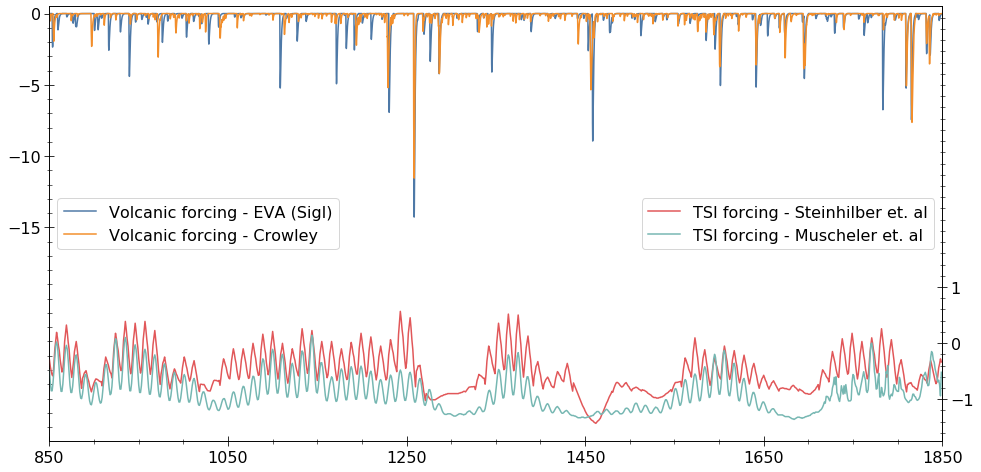

In [76]:
matplotlib.rcParams['lines.linewidth']=1.5
fig,ax=plt.subplots(1,1,figsize=(16,8))
ax.set_xlim(850,1850),ax.set_xticks(np.linspace(850,1850,6))
ax2=plt.twinx()
#plt.savefig('GFI_Talk/Period_empty.eps',format='EPS',bbox_inches='tight')
ax.set_ylim(-30,0.5),ax.set_yticks(np.linspace(-15,0,4))
ax.plot(EVA_time,EVA_forcing,label='Volcanic forcing - EVA (Sigl)',c='#4e79a7')
ax.plot(CRW_time,CRW_forcing,label='Volcanic forcing - Crowley',c='#f28e2b')
ax.legend(loc='center left',fontsize=16)
#plt.savefig('GFI_Talk/Period_Volc.eps',format='EPS',bbox_inches='tight')

ax2.plot(SBF_time,SBF_forcing-1366.14,label='TSI forcing - Steinhilber et. al',c='#e15759')
ax2.plot(VK_time,VK_forcing-1366.14,label='TSI forcing - Muscheler et. al',c='#76b7b2')
ax2.set_ylim(-1.75,6),ax2.set_yticks([-1,0,1])
ax2.legend(loc='center right',fontsize=16)
plt.savefig('GFI_Talk/Period_Volc_TSI.eps',format='EPS',bbox_inches='tight')